# Trabalho 1 - Teoria dos Grafos Aplicada

Neste trabalho, vocês deverão implementar procedimentos para a manipulação de um grafo simples com o objetivo de exercitar os conceitos básicos trabalhados nas primeiras aulas da disciplina. **A atividade deverá ser feita individualmente**. O programa de vocês fará a leitura de um grafo informado através de um arquivo de texto. O formato do arquivo é o seguinte:

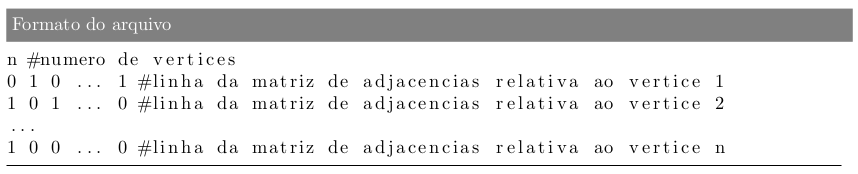

Para o grafo ilustrado na Figura 1, por exemplo, o arquivo de entrada seria o seguinte:

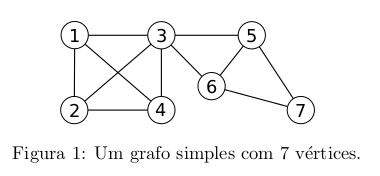

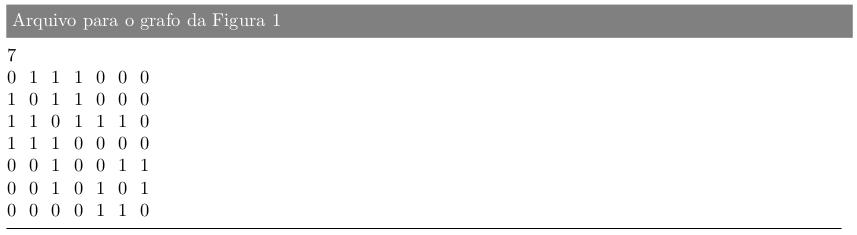





## Definições iniciais

Daqui para frente, estaremos lidando com um grafo simples $G=(V, E)$ com conjunto de vértices $V$ e conjunto de arestas $E$. Cada aresta é um par não ordenado $(i,j)$ de vértices distintos, e portanto $E ⊆ V\times V$ (relembre [aqui](https://mundoeducacao.uol.com.br/matematica/produto-cartesiano.htm?aff_source=56d95533a8284936a374e3a6da3d7996) o conceito de produto cartesiano). Lembrando que, em um grafo simples, não são permitidos laços (arestas que ligam um vértice a ele mesmo) nem arestas paralelas (duas ou mais arestas que ligam os mesmos vértices). Isto é, em um grafo simples, só há duas opções para cada par de vértices distintos $i,j \in V$: ou existe ou não existe a aresta entre eles.

## 1) Leitura e representação do grafo

Faça um código que leia o grafo de um arquivo e o represente nas duas formas vistas em sala: matriz de adjacências e lista de adjacências. Nas próximas questões, leve em conta que as duas representações do grafo estarão disponı́veis para tornar as implementações mais eficientes.

In [ ]:
private void _inicializar (String path) throws FileNotFoundException {
    Scanner scan = new Scanner(new File(path));
    this.n       = scan.nextInt();
    this.matriz  = new int[n][n];
    this.listas  = new ArrayList<LinkedList<Integer>>(n);
    
    int i, j, k;
    
    for (i = 0; i < n; i++) {
        listas.add(i, new LinkedList<Integer>());
    
        for (j = 0; j < n; j++) {
            k = scan.nextInt();
            matriz[i][j] = k;
        
            if (k != 0) listas.get(i).add(j+1);
        }
    }

    scan.close();
}

##  2) Graus mínimo e máximo
Escreva uma função que calcule os graus mínimo $\delta(G)$ e máximo $∆(G)$ de $G$. Para o grafo da Figura 1, temos que $\delta(G)=2$ e $\Delta(G)=5$.

In [ ]:
public int dMax () {
    if (n == 0)
        return 0;

    int i, temp, max;

    max = listas.get(0).size();
    for (i = 1; i < n; i++) {
        temp = listas.get(i).size();
        max = temp > max ? temp : max;
    }

    return max;
}

public int dMin () {
    if (n == 0)
        return 0;
        
    int i, temp, min;

    min = listas.get(0).size();
    for (i = 1; i < n; i++) {
        temp = listas.get(i).size();
        min = temp < min ? temp : min;
    }

    return min;
}

## 3) Sequência de graus
Escreva uma função que determine a sequência de graus de $G$.

In [ ]:
public int[] sequenciaGrau () {
    int[] graus = new int[n];
    int i, j, k;

    for (i = 0; i < n; i++) {
        j = i-1;
        k = listas.get(i).size();
    
        while (j >= 0 && graus[j] > k) {
            graus[j+1] = graus[j];
            j-=1;
        }
    
        graus[j+1] = k;
    }
    
    return graus;
}

## 4) Grau e vizinhanças de um vértice v
Escreva uma função que determine o grau e as vizinhanças aberta e fechada de um vértice $v$.

In [ ]:
public int grau (int n) {
    if (n < 1 || n > this.n || listas.size() == 0)
        return 0;

    return listas.get(n-1).size();
}

public LinkedList<Integer> vAberta (int n) {
    if (n < 1 || n > this.n) 
        return null;
    
    return listas.get(n-1);
}

public LinkedList<Integer> vFechada (int n) {
    if (n < 1 || n > this.n)
        return null;

    LinkedList<Integer> aux = listas.get(n-1);
    aux.add(n-1, n);

    return aux;
}

## 5) Adjacência
Escreva uma função que que determine se dois vértices distintos $u$ e $v$ são vizinhos (ou adjacentes). Lembrando que eles são vizinhos se a aresta entre eles existir, ou seja, se $(u,v) \in E$. Em caso afirmativo, diz-se que $u$ e $v$ são os extremos de tal aresta.

In [ ]:
public boolean ehAdjacente (int u, int v) {
    if (u < 1 || v < 1 || u > n || v > n)
        return false;
    
    return (matriz[u-1][v-1] == 1);
}

## 6) Regularidade

Um grafo é regular se todos os seus vértices possuem o mesmo grau. Se o grau de todos os vértices for igual a $k$, diz-se que o grafo é $k$-regular. Escreva uma função que informe se $G$ é regular, deixando claro o valor do grau em caso afirmativo. Abaixo segue um exemplo de um grafo 5-regular.

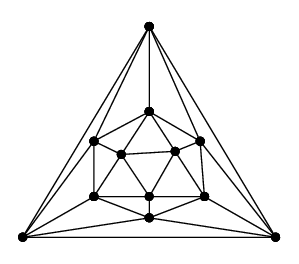

In [ ]:
public int ehRegular1 () {
    int i, v, k;
    
    v = listas.get(0).size();
    for (i = 1; i < n; i++) {
        k = listas.get(i).size();
        if (k != v)
            return -1;
    }
    return v;
}

## 7) Completude

Escreva uma função que informe se G é completo, ou seja, se ele possui todas as arestas possíveis. Sendo $n$ o número de vértices de $G$, vimos em sala que um grafo simples pode ter de 0 a $n(n-1)/2$ arestas. Portanto, o grafo completo com $n$ vértices, denotado por $K_n$, possui $n(n-1)/2$ arestas. Abaixo ilustra-se o grafo $K_7$.

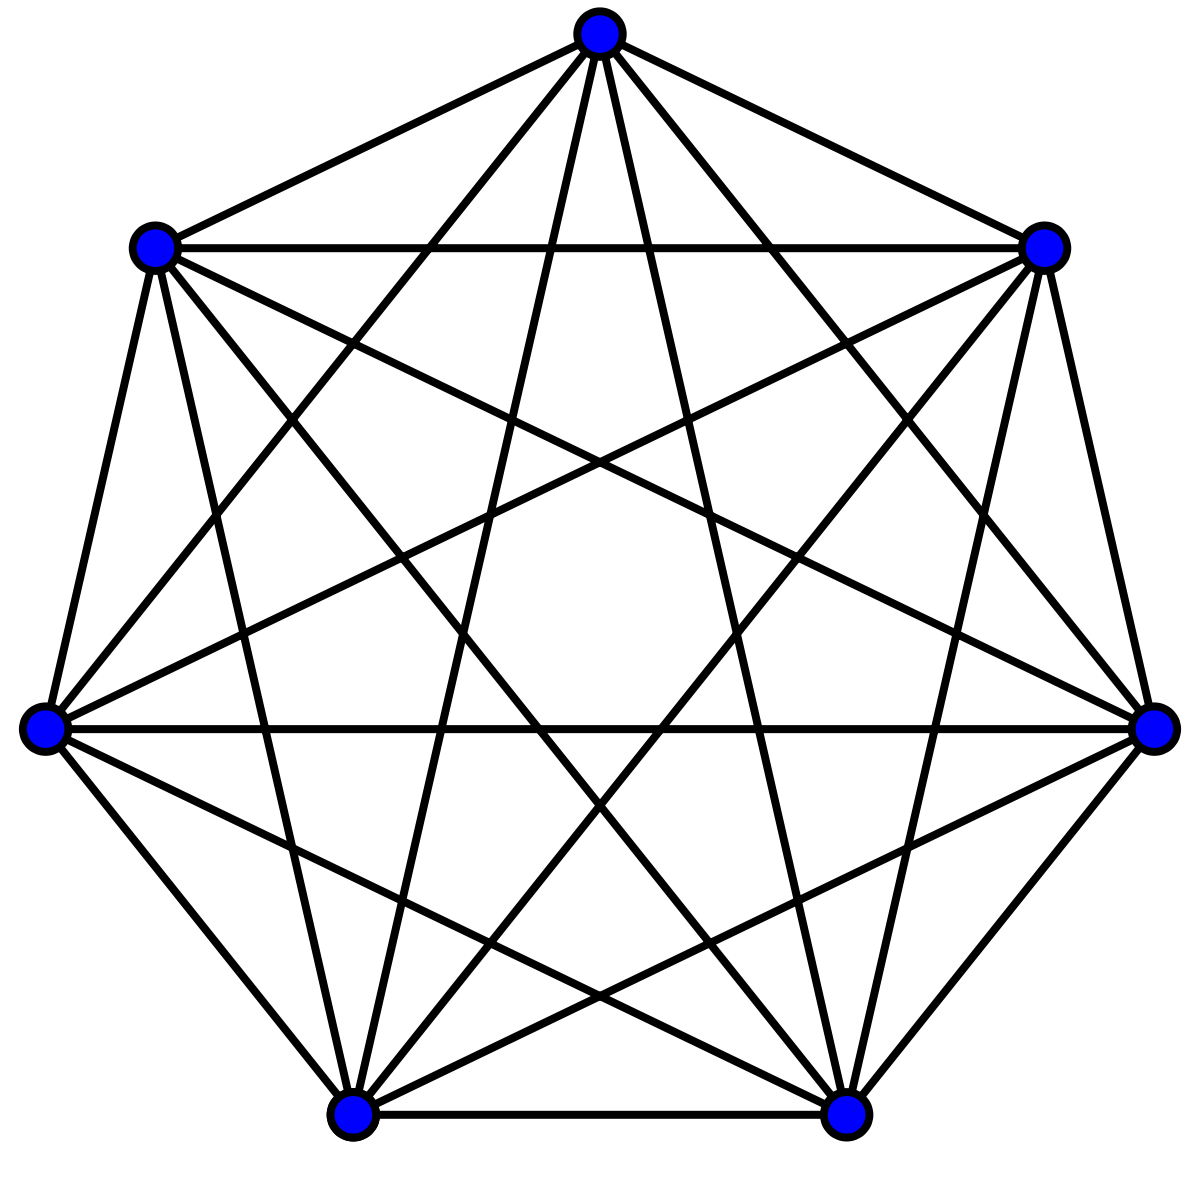


In [ ]:
public boolean completude () {
    Iterator<LinkedList<Integer>> it = listas.iterator();
    int k = (n*(n-1))/2;
    int count = 0;

    while (it.hasNext())
        count += it.next().size();
    
    return (count/2) == k;
}

## 8) Vértices universais
Escreva uma função que liste todos os vértices universais de G, que são os vértices que estão ligados a todos os outros vértice do grafo. O grau de um vértice universal é, portanto, igual a $n-1$.

In [ ]:
public LinkedList<Integer> verticesUniversais () {
    LinkedList<Integer> aux, out;
    Iterator<LinkedList<Integer>> it = listas.iterator();

    out = new LinkedList<Integer>();
    
    int i = 0;
    while (it.hasNext()) {
        aux = it.next();
        if (aux.size() == n-1)
            out.addLast(i+1);
        i++;
    }

    return out;
}

## 9) Vértices isolados
Escreva uma função que liste todos os vértices isolados de G, que são os vértices que não possuem vizinhos. O grau de um vértice isolado é, portanto, igual a 0.

In [ ]:
public LinkedList<Integer> verticesIsolados () {
    LinkedList<Integer> aux, out;
    Iterator<LinkedList<Integer>> it = listas.iterator();
    
    out = new LinkedList<Integer>();
    
    int i = 0;
    while (it.hasNext()) {
        aux = it.next();
        if (aux.size() == 0)
            out.addLast(i+1);
        i++;
    }
    return out;
}

## 10) Subgrafos
Escreva uma função que determine se uma lista de vértices e uma lista de arestas informadas pelo usuário representam um subgrafo $H$ de $G$. Para $H$ ser subgrafo de $G$, todos os seus vértices e suas arestas devem estar contidos, respectivamente, nos conjuntos de vértices e arestas de $G$. Além disso, os extremos de todas as arestas listadas pelo usuário devem estar contidos no conjunto de vértices informado, do contrário não se trata de um grafo pois teríamos uma aresta sem os dois extremos.

In [ ]:
public boolean ehSub (int[] n, int[] m) {
    if (n.length > this.n)
        return false;
    
    for (int v : n)
        if (v > this.n)
            return false;

    for (int i = 0; i < n.length-1; i++)
        if (!ehAdjacente(n[i], n[++i]))
            return false;
    
    return true;
}

## 11) Passeios

Uma sequência de $k$ vértices $v_{1}, v_2, ..., v_k$ é um passeio em $G$ se, para todo $1 \leq i \leq k-1$, vale que $v_i$ e $v_{i+1}$ são vizinhos. Isso equivale a dizer que vértices adjacentes na sequência devem ser vizinhos. Não há outra restrição a ser considerada na definição de passeio, sendo possível, por exemplo, repetir vértices e arestas. Um exemplo de passeio no grafo da Figura 1 é $1,2,3,4,3,6$.

Escreva uma função que determine se uma sequência de vértices constitui um passeio em $G$.

In [ ]:
public boolean ehPasseio (int[] n) {            
    for (int i = 0; i < n.length-1; i++)
        if (!ehAdjacente(n[i], n[i+1]))
            return false;

    return true;
}

## 12) Caminhos
Um caminho é um passeio que não repete vértices. O passeio $1,2,3,4$ é um caminho no grafo da Figura 1.

Escreva uma função que determine se uma dada sequência de vértices constitui um caminho em $G$.

In [ ]:
public boolean ehCaminho (int[] n) { 
    if (n[0] == n[n.length-1])
        return false;

    if (!ehPasseio(n))
        return false;
    
    int i, j, k;
    i = 1;
    while (i < n.length-2) {
        j = i+1;
        k = n[i];
        i = j;
        while (j < n.length-1)
            if (k == n[j++])
                return false;
    }

    return true;
}

## 13) Ciclos
Um ciclo é um passeio que não repete vértices, com exceção do primeiro e último vértices, que são iguais. O passeio $1,2,4,3,1$ é um ciclo no grafo da Figura 1.

Escreva uma função que determine se uma dada sequência de vértices constitui um ciclo em $G$.

In [ ]:
public boolean ehCiclo (int[] n) {
    if (n[0] != n[n.length-1])
        return false;

    if (!ehPasseio(n))
        return false;

    int i, j, k;
    
    i = 1;
    while (i < n.length-2) {
        j = i+1;
        k = n[i];
        i = j;
        while (j < n.length-1)
            if (k == n[j++])
                return false;
    }

    return true;
}

## 14) Trilhas
Uma trilha é um passeio que não repete arestas.

Escreva uma função que determine se uma dada sequência de vértices constitui uma trilha em $G$.

In [ ]:
#TODO

## 15) Cliques
Um subconjunto de vértices $S ⊆ V$ é um clique de $G$ se, para quaisquer dois vértices distintos $i,j \in S$, existe a aresta $(i,j)$ no grafo. Portanto, os vértices de um clique estão dois a dois conectados por uma aresta. Os seguintes conjuntos são exemplos de clique do grafo da Figura 1: $\{1,2\}, \{1,2,3\}, \{1,2,3,4\}$.

Escreva uma função que determine se um dado conjunto de vértices constitui um clique de $G$.

In [ ]:
public boolean ehClique (int[] n) {
    int i, j, a, b;
    i = 0;
    while (i < n.length-1 ) {
        a = n[i];
        j = i+1;
        i = j;
        while (j < n.length) {
            b = n[j];
            if (!ehAdjacente(a, b))
                return false;
            j++;
        }
    }
    return true;
}

## 16) Clique maximal
Um clique $S ⊆ V$ é dito maximal se não houver outro clique $S^\prime$ tal que $S^\prime ⊇ S$. Isto é, se não for possível expandir o conjunto $S$ através da inserção de um ou mais vértices de modo que o conjunto resultante ainda seja um clique. Os seguintes conjuntos são exemplos de cliques maximais do grafo da Figura 1: $\{1,2,3,4\}, \{5,6,7\}$. Observe que o conjunto $\{1,2,3\}$, apesar de ser clique, não é maximal pois ele poderia ser estendido através da adição do vértice 4.

Escreva uma função que determine se um dado conjunto de vértices constitui um clique **maximal** de $G$.

In [ ]:
#TODO

## 17) Complemento
O complemento de $G$ é um grafo $\bar{G}=(V, \bar{E})$ que possui os mesmos vértices de $G$, mas cujo conjunto de arestas é o complemento do conjunto de arestas de $G$. Portanto, uma aresta $(i,j)$ pertence a $\bar{E}$ se, e somente se, ela não pertece a $E$. O grafo abaixo corresponde ao complemento do grafo ilustrado na Figura 1.

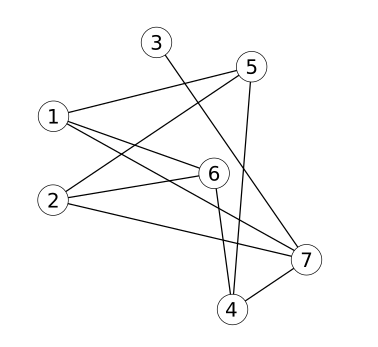

Escreva uma função que receba um grafo como parâmetro e retorne o seu complemento. Observe que o retorno da função consiste em um grafo.

In [ ]:
public Grafo complemento (Grafo g) {
    Grafo aux = new Grafo(g.n);

    for (int i = 0; i < g.n; i++) {
        for (int j = 0; j < g.n; j++) {
            aux.matriz[i][j] = (1 - g.matriz[i][j]);
            if(aux.matriz[i][j] == 1)
                aux.listas.get(i).add(j+1);
        }
    }    
    return aux;
}

## 18) Conjunto independente
Um subconjunto de vértices $S ⊆ V$ é um conjunto independente de $G$ se, para quaisquer dois vértices distintos $i,j \in S$, **não** existe a aresta $(i,j)$ no grafo. O conjunto $\{1,7\}$ é um exemplo de conjunto independente do grafo da Figura 1.

**Usando suas respostas dos itens 15 e 17**, escreva uma função que determine se um dado conjunto de vértices constitui um conjunto independente de $G$.

In [ ]:
public boolean ehIndependente (int[] n) {
    Grafo gInverso = complemento(this);
    return gInverso.ehClique(n);
}